[View in Colaboratory](https://colab.research.google.com/github/redcican/Master-Thesis/blob/master/02_1_Compare_Loss_Function_Regression.ipynb)

# 02_01 Comparison of Different Loss Function Regression


## 1. Data Preprocessing

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving FFS_01433.csv to FFS_01433.csv
User uploaded file "FFS_01433.csv" with length 14378532 bytes


## 3. Building the Neural Network

In [0]:
%matplotlib inline
%config InlineBacken.figure_format='retina'
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import time

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, initializers
from keras import optimizers
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras import losses

In [5]:
rawdf = pd.read_csv('FFS_01433.csv')
rawdf.head()

,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,...,I32,I33,I34,I35,I36,I37,I38,I39,I40,D
0,33.39,36.24,27.68,25.24,19.23,18.15,22.40,41.06,40.67,41.43,...,25.82,26.96,27.24,19.44,18.20,21.10,32.18,37.47,39.98,107.5
1,27.72,31.35,30.80,25.55,20.82,22.28,20.66,31.29,34.35,33.95,...,25.82,26.96,27.24,19.44,18.20,21.10,32.18,37.47,39.98,107.5
2,27.72,31.35,30.80,25.55,20.82,22.28,20.66,31.29,34.35,33.95,...,30.11,29.02,26.32,18.23,18.10,21.34,40.32,41.33,35.51,107.5
3,32.33,28.40,24.78,27.88,20.32,17.44,21.35,41.28,40.31,38.46,...,25.82,26.96,27.24,19.44,18.20,21.10,32.18,37.47,39.98,107.5
4,32.33,28.40,24.78,27.88,20.32,17.44,21.35,41.28,40.31,38.46,...,30.45,29.61,37.12,18.79,23.47,19.89,44.17,32.37,46.24,107.5


In [6]:
pd.options.display.float_format='{:,.2f}'.format
rawdf.describe()

,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,...,I32,I33,I34,I35,I36,I37,I38,I39,I40,D
count,"58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00",...,"58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00"
mean,30.03,29.06,29.97,28.55,20.21,19.55,19.93,39.96,41.69,40.70,...,30.55,28.31,29.86,21.24,20.15,19.95,39.42,38.59,40.49,116.55
std,2.82,3.23,2.67,2.52,1.55,1.49,1.93,4.03,4.14,3.94,...,3.45,1.97,3.42,2.97,1.95,1.62,3.30,3.81,3.91,4.09
min,23.22,22.73,24.78,23.81,17.18,15.69,15.49,31.29,32.37,32.32,...,22.73,25.76,23.81,17.18,15.69,15.49,31.29,32.37,32.32,107.50
25%,28.91,27.62,27.68,26.40,18.94,18.76,18.68,35.34,38.23,36.81,...,27.32,26.74,27.24,19.01,19.26,18.77,37.83,33.82,39.03,113.72
50%,30.54,29.70,30.21,28.28,20.32,19.36,20.76,41.06,40.67,40.54,...,30.16,28.45,30.25,20.17,20.52,19.97,39.81,39.42,40.99,116.53
75%,32.33,30.73,31.83,29.94,21.45,20.97,21.35,41.98,44.66,43.28,...,34.25,29.08,31.51,22.29,21.91,21.34,41.41,41.71,43.01,119.63
max,35.27,36.24,35.66,37.12,27.14,23.47,23.02,49.65,50.00,50.00,...,36.24,35.66,37.12,27.14,23.47,23.02,49.65,50.00,50.00,130.79


In [0]:
df = rawdf.copy()

#feature scale
ss = MinMaxScaler()
scale_features = ['I1','I2','I3','I4','I5','I6','I7','I8','I9','I10',
                 'I11','I12','I13','I14','I15','I16','I17','I18','I19','I20',
                 'I21','I22','I23','I24','I25','I26','I27','I28','I29','I30',
                 'I31','I32','I33','I34','I35','I36','I37','I38','I39','I40','D']
df[scale_features] = ss.fit_transform(df[scale_features])

In [12]:
df.tail()

,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,...,I32,I33,I34,I35,I36,I37,I38,I39,I40,D
58900,0.79,0.63,0.65,0.34,0.34,0.72,0.34,1.00,0.70,0.25,...,0.54,0.27,0.58,0.51,0.62,0.82,0.25,0.63,0.60,0.91
58901,0.58,0.00,0.60,0.92,0.00,0.03,0.18,0.68,0.31,0.56,...,0.33,0.10,0.48,0.44,0.69,0.89,0.38,0.40,0.48,0.92
58902,0.00,0.59,0.48,0.40,0.18,0.40,0.78,0.48,0.84,0.73,...,0.66,0.03,0.73,0.23,0.80,0.59,0.46,0.47,0.66,0.95
58903,0.79,0.18,0.77,0.46,0.11,0.69,0.52,0.58,0.33,0.46,...,0.66,0.03,0.73,0.23,0.80,0.59,0.46,0.47,0.66,0.95
58904,0.00,0.59,0.48,0.40,0.18,0.40,0.78,0.48,0.84,0.73,...,0.73,0.51,0.20,0.41,0.14,0.72,0.54,0.49,0.55,1.00


In [15]:
X = df.drop(['D'],axis=1).values
Y = (df['D'].values).reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_train.shape, Y_train.shape, X_test.shape,Y_test.shape)

(47124, 40) (47124, 1) (11781, 40) (11781, 1)


In [0]:
epochs = 100
batch_size = 256

In [0]:
def model(loss):
  model = Sequential()
  model.add(Dense(64, input_shape=(X.shape[1],), activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(1))
  
  model.compile(loss=loss,
               optimizer='adam',metrics=['accuracy'])
  
  return model

### 3.1 Loss = Mean Squared Error





In [0]:
loss_1 =losses.mean_squared_error

In [21]:
start = time.time()
model_1 = model(loss_1)
model_1_history = model_1.fit(X_train, Y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_test, Y_test))
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 47124 samples, validate on 11781 samples
Epoch 1/100
 - 2s - loss: 0.0231 - acc: 0.0031 - val_loss: 0.0156 - val_acc: 0.0025
Epoch 2/100
 - 1s - loss: 0.0142 - acc: 0.0031 - val_loss: 0.0141 - val_acc: 0.0025
Epoch 3/100
 - 1s - loss: 0.0131 - acc: 0.0031 - val_loss: 0.0132 - val_acc: 0.0025
Epoch 4/100
 - 1s - loss: 0.0125 - acc: 0.0031 - val_loss: 0.0125 - val_acc: 0.0025
Epoch 5/100
 - 1s - loss: 0.0118 - acc: 0.0031 - val_loss: 0.0121 - val_acc: 0.0025
Epoch 6/100
 - 1s - loss: 0.0115 - acc: 0.0031 - val_loss: 0.0128 - val_acc: 0.0025
Epoch 7/100
 - 1s - loss: 0.0112 - acc: 0.0031 - val_loss: 0.0116 - val_acc: 0.0025
Epoch 8/100
 - 1s - loss: 0.0110 - acc: 0.0031 - val_loss: 0.0113 - val_acc: 0.0025
Epoch 9/100
 - 1s - loss: 0.0107 - acc: 0.0031 - val_loss: 0.0111 - val_acc: 0.0025
Epoch 10/100
 - 1s - loss: 0.0105 - acc: 0.0031 - val_loss: 0.0109 - val_acc: 0.0025
Epoch 11/100
 - 1s - loss: 0.0103 - acc: 0.0031 - val_loss: 0.0112 - val_acc: 0.0025
Epoch 12/100
 - 1s - los

 - 1s - loss: 0.0080 - acc: 0.0031 - val_loss: 0.0088 - val_acc: 0.0025
Epoch 35/100
 - 1s - loss: 0.0080 - acc: 0.0031 - val_loss: 0.0087 - val_acc: 0.0025
Epoch 36/100
 - 1s - loss: 0.0079 - acc: 0.0031 - val_loss: 0.0088 - val_acc: 0.0025
Epoch 37/100
 - 1s - loss: 0.0079 - acc: 0.0031 - val_loss: 0.0089 - val_acc: 0.0025
Epoch 38/100
 - 1s - loss: 0.0079 - acc: 0.0031 - val_loss: 0.0088 - val_acc: 0.0025
Epoch 39/100
 - 1s - loss: 0.0078 - acc: 0.0031 - val_loss: 0.0088 - val_acc: 0.0025
Epoch 40/100
 - 1s - loss: 0.0077 - acc: 0.0031 - val_loss: 0.0091 - val_acc: 0.0025
Epoch 41/100
 - 1s - loss: 0.0077 - acc: 0.0031 - val_loss: 0.0086 - val_acc: 0.0025
Epoch 42/100
 - 1s - loss: 0.0076 - acc: 0.0031 - val_loss: 0.0087 - val_acc: 0.0025
Epoch 43/100
 - 1s - loss: 0.0078 - acc: 0.0031 - val_loss: 0.0086 - val_acc: 0.0025
Epoch 44/100
 - 1s - loss: 0.0076 - acc: 0.0031 - val_loss: 0.0086 - val_acc: 0.0025
Epoch 45/100
 - 1s - loss: 0.0076 - acc: 0.0031 - val_loss: 0.0086 - val_acc: 

Epoch 68/100
 - 1s - loss: 0.0071 - acc: 0.0031 - val_loss: 0.0082 - val_acc: 0.0025
Epoch 69/100
 - 1s - loss: 0.0071 - acc: 0.0031 - val_loss: 0.0083 - val_acc: 0.0025
Epoch 70/100
 - 1s - loss: 0.0070 - acc: 0.0031 - val_loss: 0.0083 - val_acc: 0.0025
Epoch 71/100
 - 1s - loss: 0.0071 - acc: 0.0031 - val_loss: 0.0082 - val_acc: 0.0025
Epoch 72/100
 - 1s - loss: 0.0071 - acc: 0.0031 - val_loss: 0.0084 - val_acc: 0.0025
Epoch 73/100
 - 1s - loss: 0.0070 - acc: 0.0031 - val_loss: 0.0082 - val_acc: 0.0025
Epoch 74/100
 - 1s - loss: 0.0070 - acc: 0.0031 - val_loss: 0.0082 - val_acc: 0.0025
Epoch 75/100
 - 1s - loss: 0.0070 - acc: 0.0031 - val_loss: 0.0084 - val_acc: 0.0025
Epoch 76/100
 - 1s - loss: 0.0071 - acc: 0.0031 - val_loss: 0.0090 - val_acc: 0.0025
Epoch 77/100
 - 1s - loss: 0.0070 - acc: 0.0031 - val_loss: 0.0081 - val_acc: 0.0025
Epoch 78/100
 - 1s - loss: 0.0069 - acc: 0.0031 - val_loss: 0.0084 - val_acc: 0.0025
Epoch 79/100
 - 1s - loss: 0.0070 - acc: 0.0031 - val_loss: 0.008

In [27]:
train_loss_1 = model_1.evaluate(X_train, Y_train, verbose=0)[0]
print("Training loss " ,(train_loss_1))
test_loss_1 = model_1.evaluate(X_test, Y_test, verbose=0)[0]
print("Testing loss" ,(test_loss_1))

Training loss  0.006533919532290276
Testing loss 0.007939701024750428


### 3.2 Loss = mean_absolute_error

In [0]:
loss_2 =losses.mean_absolute_error

In [29]:
start = time.time()
model_2 = model(loss_2)
model_2_history = model_2.fit(X_train, Y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_test,Y_test))
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 47124 samples, validate on 11781 samples
Epoch 1/100
 - 1s - loss: 0.1166 - acc: 0.0030 - val_loss: 0.1079 - val_acc: 0.0025
Epoch 2/100
 - 1s - loss: 0.0968 - acc: 0.0031 - val_loss: 0.0986 - val_acc: 0.0025
Epoch 3/100
 - 1s - loss: 0.0931 - acc: 0.0031 - val_loss: 0.0922 - val_acc: 0.0025
Epoch 4/100
 - 1s - loss: 0.0903 - acc: 0.0031 - val_loss: 0.0915 - val_acc: 0.0025
Epoch 5/100
 - 1s - loss: 0.0880 - acc: 0.0031 - val_loss: 0.0888 - val_acc: 0.0025
Epoch 6/100
 - 1s - loss: 0.0867 - acc: 0.0031 - val_loss: 0.0908 - val_acc: 0.0025
Epoch 7/100
 - 1s - loss: 0.0849 - acc: 0.0031 - val_loss: 0.0851 - val_acc: 0.0025
Epoch 8/100
 - 1s - loss: 0.0836 - acc: 0.0031 - val_loss: 0.0840 - val_acc: 0.0025
Epoch 9/100
 - 1s - loss: 0.0825 - acc: 0.0031 - val_loss: 0.0830 - val_acc: 0.0025
Epoch 10/100
 - 1s - loss: 0.0812 - acc: 0.0031 - val_loss: 0.0833 - val_acc: 0.0025
Epoch 11/100
 - 1s - loss: 0.0808 - acc: 0.0031 - val_loss: 0.0835 - val_acc: 0.0025
Epoch 12/100
 - 1s - los

 - 1s - loss: 0.0716 - acc: 0.0031 - val_loss: 0.0731 - val_acc: 0.0025
Epoch 35/100
 - 1s - loss: 0.0709 - acc: 0.0031 - val_loss: 0.0728 - val_acc: 0.0025
Epoch 36/100
 - 1s - loss: 0.0706 - acc: 0.0031 - val_loss: 0.0742 - val_acc: 0.0025
Epoch 37/100
 - 1s - loss: 0.0705 - acc: 0.0031 - val_loss: 0.0739 - val_acc: 0.0025
Epoch 38/100
 - 1s - loss: 0.0705 - acc: 0.0031 - val_loss: 0.0725 - val_acc: 0.0025
Epoch 39/100
 - 1s - loss: 0.0702 - acc: 0.0031 - val_loss: 0.0770 - val_acc: 0.0025
Epoch 40/100
 - 1s - loss: 0.0699 - acc: 0.0031 - val_loss: 0.0735 - val_acc: 0.0025
Epoch 41/100
 - 1s - loss: 0.0697 - acc: 0.0031 - val_loss: 0.0736 - val_acc: 0.0025
Epoch 42/100
 - 1s - loss: 0.0695 - acc: 0.0031 - val_loss: 0.0717 - val_acc: 0.0025
Epoch 43/100
 - 1s - loss: 0.0694 - acc: 0.0031 - val_loss: 0.0775 - val_acc: 0.0025
Epoch 44/100
 - 1s - loss: 0.0695 - acc: 0.0031 - val_loss: 0.0740 - val_acc: 0.0025
Epoch 45/100
 - 1s - loss: 0.0695 - acc: 0.0031 - val_loss: 0.0712 - val_acc: 

Epoch 68/100
 - 1s - loss: 0.0665 - acc: 0.0031 - val_loss: 0.0704 - val_acc: 0.0025
Epoch 69/100
 - 1s - loss: 0.0666 - acc: 0.0031 - val_loss: 0.0696 - val_acc: 0.0025
Epoch 70/100
 - 1s - loss: 0.0664 - acc: 0.0031 - val_loss: 0.0714 - val_acc: 0.0025
Epoch 71/100
 - 1s - loss: 0.0665 - acc: 0.0031 - val_loss: 0.0700 - val_acc: 0.0025
Epoch 72/100
 - 1s - loss: 0.0662 - acc: 0.0031 - val_loss: 0.0712 - val_acc: 0.0025
Epoch 73/100
 - 1s - loss: 0.0664 - acc: 0.0031 - val_loss: 0.0690 - val_acc: 0.0025
Epoch 74/100
 - 1s - loss: 0.0659 - acc: 0.0031 - val_loss: 0.0708 - val_acc: 0.0025
Epoch 75/100
 - 1s - loss: 0.0661 - acc: 0.0031 - val_loss: 0.0698 - val_acc: 0.0025
Epoch 76/100
 - 1s - loss: 0.0661 - acc: 0.0031 - val_loss: 0.0711 - val_acc: 0.0025
Epoch 77/100
 - 1s - loss: 0.0659 - acc: 0.0031 - val_loss: 0.0699 - val_acc: 0.0025
Epoch 78/100
 - 1s - loss: 0.0656 - acc: 0.0031 - val_loss: 0.0700 - val_acc: 0.0025
Epoch 79/100
 - 1s - loss: 0.0651 - acc: 0.0031 - val_loss: 0.069

In [30]:
train_loss_2 = model_2.evaluate(X_train, Y_train, verbose=0)[0]
print("Training loss " ,(train_loss_2))
test_loss_2 = model_2.evaluate(X_test, Y_test, verbose=0)[0]
print("Testing loss" ,(test_loss_2))

Training loss  0.06349460743845152
Testing loss 0.06862134829906016


### 3.4 loss = mean_squared_logarithmic_error


In [0]:
loss_4 =losses.mean_squared_logarithmic_error

In [35]:
start = time.time()
model_4 = model(loss_4)
model_4_history = model_4.fit(X_train, Y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_test, Y_test))
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 47124 samples, validate on 11781 samples
Epoch 1/100
 - 2s - loss: 0.0136 - acc: 0.0029 - val_loss: 0.0083 - val_acc: 0.0025
Epoch 2/100
 - 1s - loss: 0.0074 - acc: 0.0031 - val_loss: 0.0072 - val_acc: 0.0025
Epoch 3/100
 - 1s - loss: 0.0069 - acc: 0.0031 - val_loss: 0.0070 - val_acc: 0.0025
Epoch 4/100
 - 1s - loss: 0.0065 - acc: 0.0031 - val_loss: 0.0066 - val_acc: 0.0025
Epoch 5/100
 - 1s - loss: 0.0063 - acc: 0.0031 - val_loss: 0.0066 - val_acc: 0.0025
Epoch 6/100
 - 1s - loss: 0.0061 - acc: 0.0031 - val_loss: 0.0062 - val_acc: 0.0025
Epoch 7/100
 - 1s - loss: 0.0059 - acc: 0.0031 - val_loss: 0.0066 - val_acc: 0.0025
Epoch 8/100
 - 1s - loss: 0.0058 - acc: 0.0031 - val_loss: 0.0059 - val_acc: 0.0025
Epoch 9/100
 - 1s - loss: 0.0057 - acc: 0.0031 - val_loss: 0.0058 - val_acc: 0.0025
Epoch 10/100
 - 1s - loss: 0.0056 - acc: 0.0031 - val_loss: 0.0058 - val_acc: 0.0025
Epoch 11/100
 - 1s - loss: 0.0055 - acc: 0.0031 - val_loss: 0.0058 - val_acc: 0.0025
Epoch 12/100
 - 1s - los

 - 1s - loss: 0.0044 - acc: 0.0031 - val_loss: 0.0050 - val_acc: 0.0025
Epoch 35/100
 - 1s - loss: 0.0044 - acc: 0.0031 - val_loss: 0.0047 - val_acc: 0.0025
Epoch 36/100
 - 1s - loss: 0.0044 - acc: 0.0031 - val_loss: 0.0047 - val_acc: 0.0025
Epoch 37/100
 - 1s - loss: 0.0043 - acc: 0.0031 - val_loss: 0.0049 - val_acc: 0.0025
Epoch 38/100
 - 1s - loss: 0.0043 - acc: 0.0031 - val_loss: 0.0047 - val_acc: 0.0025
Epoch 39/100
 - 1s - loss: 0.0043 - acc: 0.0031 - val_loss: 0.0048 - val_acc: 0.0025
Epoch 40/100
 - 1s - loss: 0.0043 - acc: 0.0031 - val_loss: 0.0046 - val_acc: 0.0025
Epoch 41/100
 - 1s - loss: 0.0043 - acc: 0.0031 - val_loss: 0.0047 - val_acc: 0.0025
Epoch 42/100
 - 1s - loss: 0.0042 - acc: 0.0031 - val_loss: 0.0049 - val_acc: 0.0025
Epoch 43/100
 - 1s - loss: 0.0042 - acc: 0.0031 - val_loss: 0.0046 - val_acc: 0.0025
Epoch 44/100
 - 1s - loss: 0.0042 - acc: 0.0031 - val_loss: 0.0049 - val_acc: 0.0025
Epoch 45/100
 - 1s - loss: 0.0042 - acc: 0.0031 - val_loss: 0.0050 - val_acc: 

Epoch 68/100
 - 1s - loss: 0.0038 - acc: 0.0031 - val_loss: 0.0055 - val_acc: 0.0025
Epoch 69/100
 - 1s - loss: 0.0038 - acc: 0.0031 - val_loss: 0.0044 - val_acc: 0.0025
Epoch 70/100
 - 1s - loss: 0.0038 - acc: 0.0031 - val_loss: 0.0046 - val_acc: 0.0025
Epoch 71/100
 - 1s - loss: 0.0038 - acc: 0.0031 - val_loss: 0.0044 - val_acc: 0.0025
Epoch 72/100
 - 1s - loss: 0.0038 - acc: 0.0031 - val_loss: 0.0044 - val_acc: 0.0025
Epoch 73/100
 - 1s - loss: 0.0038 - acc: 0.0031 - val_loss: 0.0044 - val_acc: 0.0025
Epoch 74/100
 - 1s - loss: 0.0037 - acc: 0.0031 - val_loss: 0.0044 - val_acc: 0.0025
Epoch 75/100
 - 1s - loss: 0.0037 - acc: 0.0031 - val_loss: 0.0045 - val_acc: 0.0025
Epoch 76/100
 - 1s - loss: 0.0038 - acc: 0.0031 - val_loss: 0.0045 - val_acc: 0.0025
Epoch 77/100
 - 1s - loss: 0.0037 - acc: 0.0031 - val_loss: 0.0044 - val_acc: 0.0025
Epoch 78/100
 - 1s - loss: 0.0037 - acc: 0.0031 - val_loss: 0.0044 - val_acc: 0.0025
Epoch 79/100
 - 1s - loss: 0.0037 - acc: 0.0031 - val_loss: 0.004

In [36]:
train_loss_4 = model_4.evaluate(X_train, Y_train, verbose=0)[0]
print("Training loss " ,(train_loss_4))
test_loss_4 = model_1.evaluate(X_test, Y_test, verbose=0)[0]
print("Testing loss" ,(test_loss_4))

Training loss  0.003478534926439248
Testing loss 0.007939701024750428


### 3.5 loss = squared_hinge



In [0]:
loss_5 = losses.squared_hinge

In [38]:
start = time.time()
model_5 = model(loss_5)
model_5_history = model_5.fit(X_train, Y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_test,Y_test))
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 47124 samples, validate on 11781 samples
Epoch 1/100
 - 2s - loss: 0.1629 - acc: 3.3953e-04 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 2/100
 - 1s - loss: 0.0050 - acc: 0.0000e+00 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 3/100
 - 1s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 4/100
 - 1s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 5/100
 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 6/100
 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 7/100
 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 8/100
 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 9/100
 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 10/100
 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 11/100
 - 1s - loss: 0.

Epoch 33/100
 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 34/100
 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 35/100
 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 36/100
 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 37/100
 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 38/100
 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 39/100
 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 40/100
 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 41/100
 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 42/100
 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 43/100
 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025

 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 66/100
 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 67/100
 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 68/100
 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 69/100
 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 70/100
 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 71/100
 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 72/100
 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 73/100
 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 74/100
 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 75/100
 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0

 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 98/100
 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 99/100
 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 100/100
 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
@ Total Time Spent: 135.39 seconds


In [39]:
train_loss_5 = model_5.evaluate(X_train, Y_train, verbose=0)[0]
print("Training loss " ,(train_loss_5))
test_loss_5 = model_5.evaluate(X_test, Y_test, verbose=0)[0]
print("Testing loss" ,(test_loss_5))

Training loss  0.003076988371106018
Testing loss 0.0024615906968848147


### 3.6 loss = hinge

In [0]:
loss_6 = losses.hinge

In [41]:
start = time.time()
model_6 = model(loss_6)
model_6_history = model_6.fit(X_train, Y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_test, Y_test))
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 47124 samples, validate on 11781 samples
Epoch 1/100
 - 2s - loss: 0.1126 - acc: 1.0610e-04 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 2/100
 - 1s - loss: 0.0045 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 3/100
 - 1s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 4/100
 - 1s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 5/100
 - 1s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 6/100
 - 1s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 7/100
 - 1s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 8/100
 - 1s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 9/100
 - 1s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 10/100
 - 1s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 11/100
 - 1s - loss: 0.

Epoch 33/100
 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 34/100
 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 35/100
 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 36/100
 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 37/100
 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 38/100
 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 39/100
 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 40/100
 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 41/100
 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 42/100
 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 43/100
 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025

 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 66/100
 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 67/100
 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 68/100
 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 69/100
 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 70/100
 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 71/100
 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 72/100
 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 73/100
 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 74/100
 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 75/100
 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0

 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 98/100
 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 99/100
 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 100/100
 - 1s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
@ Total Time Spent: 134.99 seconds


In [42]:
train_loss_6 = model_6.evaluate(X_train, Y_train, verbose=0)[0]
print("Training loss " ,(train_loss_6))
test_loss_6 = model_6.evaluate(X_test, Y_test, verbose=0)[0]
print("Testing loss" ,(test_loss_6))

Training loss  0.003076988371106018
Testing loss 0.0024615906968848147


### 3.8 loss = logcosh

In [0]:
loss_8 = losses.logcosh

In [47]:
start = time.time()
model_8 = model(loss_8)
model_8_history = model_8.fit(X_train, Y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_test,Y_test))
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 47124 samples, validate on 11781 samples
Epoch 1/100
 - 2s - loss: 0.0153 - acc: 0.0031 - val_loss: 0.0082 - val_acc: 0.0025
Epoch 2/100
 - 1s - loss: 0.0074 - acc: 0.0031 - val_loss: 0.0072 - val_acc: 0.0025
Epoch 3/100
 - 1s - loss: 0.0067 - acc: 0.0031 - val_loss: 0.0068 - val_acc: 0.0025
Epoch 4/100
 - 1s - loss: 0.0063 - acc: 0.0031 - val_loss: 0.0065 - val_acc: 0.0025
Epoch 5/100
 - 1s - loss: 0.0061 - acc: 0.0031 - val_loss: 0.0061 - val_acc: 0.0025
Epoch 6/100
 - 1s - loss: 0.0058 - acc: 0.0031 - val_loss: 0.0059 - val_acc: 0.0025
Epoch 7/100
 - 1s - loss: 0.0056 - acc: 0.0031 - val_loss: 0.0063 - val_acc: 0.0025
Epoch 8/100
 - 1s - loss: 0.0056 - acc: 0.0031 - val_loss: 0.0058 - val_acc: 0.0025
Epoch 9/100
 - 1s - loss: 0.0054 - acc: 0.0031 - val_loss: 0.0059 - val_acc: 0.0025
Epoch 10/100
 - 1s - loss: 0.0054 - acc: 0.0031 - val_loss: 0.0055 - val_acc: 0.0025
Epoch 11/100
 - 1s - loss: 0.0053 - acc: 0.0031 - val_loss: 0.0054 - val_acc: 0.0025
Epoch 12/100
 - 1s - los

 - 1s - loss: 0.0043 - acc: 0.0031 - val_loss: 0.0047 - val_acc: 0.0025
Epoch 35/100
 - 1s - loss: 0.0042 - acc: 0.0031 - val_loss: 0.0047 - val_acc: 0.0025
Epoch 36/100
 - 1s - loss: 0.0042 - acc: 0.0031 - val_loss: 0.0047 - val_acc: 0.0025
Epoch 37/100
 - 1s - loss: 0.0042 - acc: 0.0031 - val_loss: 0.0046 - val_acc: 0.0025
Epoch 38/100
 - 1s - loss: 0.0041 - acc: 0.0031 - val_loss: 0.0045 - val_acc: 0.0025
Epoch 39/100
 - 1s - loss: 0.0041 - acc: 0.0031 - val_loss: 0.0045 - val_acc: 0.0025
Epoch 40/100
 - 1s - loss: 0.0041 - acc: 0.0031 - val_loss: 0.0044 - val_acc: 0.0025
Epoch 41/100
 - 1s - loss: 0.0041 - acc: 0.0031 - val_loss: 0.0044 - val_acc: 0.0025
Epoch 42/100
 - 1s - loss: 0.0041 - acc: 0.0031 - val_loss: 0.0045 - val_acc: 0.0025
Epoch 43/100
 - 1s - loss: 0.0041 - acc: 0.0031 - val_loss: 0.0049 - val_acc: 0.0025
Epoch 44/100
 - 1s - loss: 0.0040 - acc: 0.0031 - val_loss: 0.0044 - val_acc: 0.0025
Epoch 45/100
 - 1s - loss: 0.0040 - acc: 0.0031 - val_loss: 0.0048 - val_acc: 

Epoch 68/100
 - 1s - loss: 0.0037 - acc: 0.0031 - val_loss: 0.0042 - val_acc: 0.0025
Epoch 69/100
 - 1s - loss: 0.0037 - acc: 0.0031 - val_loss: 0.0045 - val_acc: 0.0025
Epoch 70/100
 - 1s - loss: 0.0037 - acc: 0.0031 - val_loss: 0.0043 - val_acc: 0.0025
Epoch 71/100
 - 1s - loss: 0.0037 - acc: 0.0031 - val_loss: 0.0042 - val_acc: 0.0025
Epoch 72/100
 - 1s - loss: 0.0037 - acc: 0.0031 - val_loss: 0.0042 - val_acc: 0.0025
Epoch 73/100
 - 1s - loss: 0.0037 - acc: 0.0031 - val_loss: 0.0048 - val_acc: 0.0025
Epoch 74/100
 - 1s - loss: 0.0037 - acc: 0.0031 - val_loss: 0.0048 - val_acc: 0.0025
Epoch 75/100
 - 1s - loss: 0.0037 - acc: 0.0031 - val_loss: 0.0045 - val_acc: 0.0025
Epoch 76/100
 - 1s - loss: 0.0036 - acc: 0.0031 - val_loss: 0.0043 - val_acc: 0.0025
Epoch 77/100
 - 1s - loss: 0.0037 - acc: 0.0031 - val_loss: 0.0046 - val_acc: 0.0025
Epoch 78/100
 - 1s - loss: 0.0037 - acc: 0.0031 - val_loss: 0.0042 - val_acc: 0.0025
Epoch 79/100
 - 1s - loss: 0.0036 - acc: 0.0031 - val_loss: 0.004

In [48]:
train_loss_8 = model_8.evaluate(X_train, Y_train, verbose=0)[0]
print("Training loss " ,(train_loss_8))
test_loss_8 = model_8.evaluate(X_test, Y_test, verbose=0)[0]
print("Testing loss" ,(test_loss_8))

Training loss  0.003631693501928697
Testing loss 0.004272341470221211


### 3.10 loss = binary_crossentropy

In [0]:
loss_10 = losses.binary_crossentropy

In [55]:
start = time.time()
model_10 = model(loss_10)
model_10_history = model_10.fit(X_train, Y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_test,Y_test))
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 47124 samples, validate on 11781 samples
Epoch 1/100
 - 2s - loss: 0.7976 - acc: 0.0030 - val_loss: 0.6414 - val_acc: 0.0025
Epoch 2/100
 - 1s - loss: 0.6357 - acc: 0.0031 - val_loss: 0.6345 - val_acc: 0.0025
Epoch 3/100
 - 1s - loss: 0.6313 - acc: 0.0031 - val_loss: 0.6322 - val_acc: 0.0025
Epoch 4/100
 - 1s - loss: 0.6293 - acc: 0.0031 - val_loss: 0.6305 - val_acc: 0.0025
Epoch 5/100
 - 1s - loss: 0.6280 - acc: 0.0031 - val_loss: 0.6298 - val_acc: 0.0025
Epoch 6/100
 - 1s - loss: 0.6272 - acc: 0.0031 - val_loss: 0.6288 - val_acc: 0.0025
Epoch 7/100
 - 1s - loss: 0.6266 - acc: 0.0031 - val_loss: 0.6285 - val_acc: 0.0025
Epoch 8/100
 - 1s - loss: 0.6260 - acc: 0.0031 - val_loss: 0.6274 - val_acc: 0.0025
Epoch 9/100
 - 1s - loss: 0.6253 - acc: 0.0031 - val_loss: 0.6275 - val_acc: 0.0025
Epoch 10/100
 - 1s - loss: 0.6251 - acc: 0.0031 - val_loss: 0.6271 - val_acc: 0.0025
Epoch 11/100
 - 1s - loss: 0.6246 - acc: 0.0031 - val_loss: 0.6262 - val_acc: 0.0025
Epoch 12/100
 - 1s - los

 - 1s - loss: 0.6191 - acc: 0.0031 - val_loss: 0.6212 - val_acc: 0.0025
Epoch 35/100
 - 1s - loss: 0.6188 - acc: 0.0031 - val_loss: 0.6210 - val_acc: 0.0025
Epoch 36/100
 - 1s - loss: 0.6187 - acc: 0.0031 - val_loss: 0.6210 - val_acc: 0.0025
Epoch 37/100
 - 1s - loss: 0.6186 - acc: 0.0031 - val_loss: 0.6220 - val_acc: 0.0025
Epoch 38/100
 - 1s - loss: 0.6183 - acc: 0.0031 - val_loss: 0.6207 - val_acc: 0.0025
Epoch 39/100
 - 1s - loss: 0.6183 - acc: 0.0031 - val_loss: 0.6238 - val_acc: 0.0025
Epoch 40/100
 - 1s - loss: 0.6182 - acc: 0.0031 - val_loss: 0.6211 - val_acc: 0.0025
Epoch 41/100
 - 1s - loss: 0.6182 - acc: 0.0031 - val_loss: 0.6206 - val_acc: 0.0025
Epoch 42/100
 - 1s - loss: 0.6178 - acc: 0.0031 - val_loss: 0.6205 - val_acc: 0.0025
Epoch 43/100
 - 1s - loss: 0.6181 - acc: 0.0031 - val_loss: 0.6209 - val_acc: 0.0025
Epoch 44/100
 - 1s - loss: 0.6176 - acc: 0.0031 - val_loss: 0.6211 - val_acc: 0.0025
Epoch 45/100
 - 1s - loss: 0.6177 - acc: 0.0031 - val_loss: 0.6207 - val_acc: 

Epoch 68/100
 - 1s - loss: 0.6160 - acc: 0.0031 - val_loss: 0.6197 - val_acc: 0.0025
Epoch 69/100
 - 1s - loss: 0.6159 - acc: 0.0031 - val_loss: 0.6199 - val_acc: 0.0025
Epoch 70/100
 - 1s - loss: 0.6161 - acc: 0.0031 - val_loss: 0.6195 - val_acc: 0.0025
Epoch 71/100
 - 1s - loss: 0.6157 - acc: 0.0031 - val_loss: 0.6192 - val_acc: 0.0025
Epoch 72/100
 - 1s - loss: 0.6158 - acc: 0.0031 - val_loss: 0.6193 - val_acc: 0.0025
Epoch 73/100
 - 1s - loss: 0.6157 - acc: 0.0031 - val_loss: 0.6203 - val_acc: 0.0025
Epoch 74/100
 - 1s - loss: 0.6155 - acc: 0.0031 - val_loss: 0.6191 - val_acc: 0.0025
Epoch 75/100
 - 1s - loss: 0.6153 - acc: 0.0031 - val_loss: 0.6192 - val_acc: 0.0025
Epoch 76/100
 - 1s - loss: 0.6154 - acc: 0.0031 - val_loss: 0.6191 - val_acc: 0.0025
Epoch 77/100
 - 1s - loss: 0.6154 - acc: 0.0031 - val_loss: 0.6189 - val_acc: 0.0025
Epoch 78/100
 - 1s - loss: 0.6157 - acc: 0.0031 - val_loss: 0.6194 - val_acc: 0.0025
Epoch 79/100
 - 1s - loss: 0.6153 - acc: 0.0031 - val_loss: 0.618

In [56]:
train_loss_10 = model_10.evaluate(X_train, Y_train, verbose=0)[0]
print("Training loss " ,(train_loss_10))
test_loss_10 = model_10.evaluate(X_test, Y_test, verbose=0)[0]
print("Testing loss" ,(test_loss_10))

Training loss  0.6153716480182515
Testing loss 0.6191936598124826


## Plot the Result and Compare

In [0]:
colors = sns.color_palette("tab10", 10)
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 1

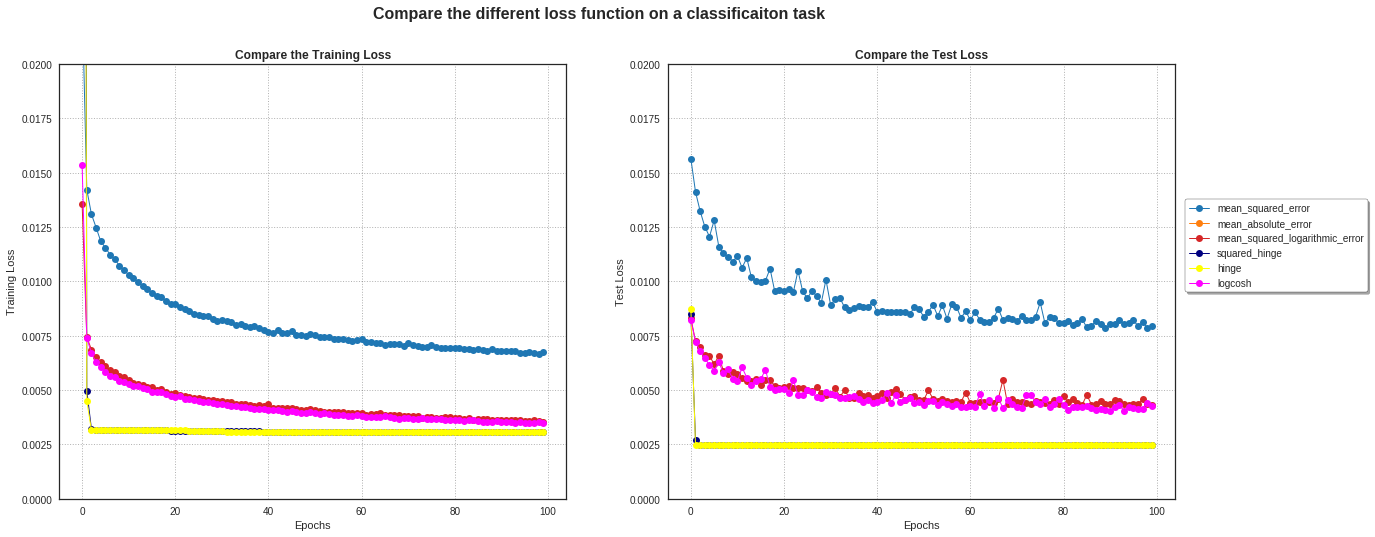

In [103]:
plt.style.use('seaborn-white')
fig,((ax3,ax4)) = plt.subplots(1,2,figsize=(20,8))



ax3.plot(model_1_history.history['loss'], linestyle='-', marker='o',color=colors[0],label='mean_squared_error')
ax3.plot(model_2_history.history['loss'], linestyle='-', marker='o',color=colors[1],label='mean_absolute_error')
ax3.plot(model_4_history.history['loss'], linestyle='-', marker='o',color=colors[3],label='mean_squared_logarithmic_error')
ax3.plot(model_5_history.history['loss'], linestyle='-', marker='o',color='navy',label='squared_hinge')
ax3.plot(model_6_history.history['loss'], linestyle='-', marker='o',color='yellow',label='hinge')
ax3.plot(model_8_history.history['loss'], linestyle='-', marker='o',color='fuchsia',label='logcosh')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Training Loss')
ax3.set_ylim(0,0.02)
ax3.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax3.set_title('Compare the Training Loss',fontsize=12, fontweight='bold')

ax4.plot(model_1_history.history['val_loss'], linestyle='-', marker='o',color=colors[0],label='mean_squared_error')
ax4.plot(model_2_history.history['val_loss'], linestyle='-', marker='o',color=colors[1],label='mean_absolute_error')
ax4.plot(model_4_history.history['val_loss'], linestyle='-', marker='o',color=colors[3],label='mean_squared_logarithmic_error')
ax4.plot(model_5_history.history['val_loss'], linestyle='-', marker='o',color='navy',label='squared_hinge')
ax4.plot(model_6_history.history['val_loss'], linestyle='-', marker='o',color='yellow',label='hinge')
ax4.plot(model_8_history.history['val_loss'], linestyle='-', marker='o',color='fuchsia',label='logcosh')
ax4.set_xlabel('Epochs')
ax4.set_ylabel('Test Loss')
ax4.set_ylim(0,0.02)
ax4.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax4.set_title('Compare the Test Loss',fontsize=12, fontweight='bold')

plt.legend(loc='upper center', bbox_to_anchor=(1.2, 0.7),
          ncol=1, fancybox=True, shadow=True, frameon=True,edgecolor='black')


fig.suptitle('Compare the different loss function on a classificaiton task',fontsize=16, fontweight='bold')
plt.show()